Mean Squared Error: 16.689450654964617
R-squared: 0.6730160669102765


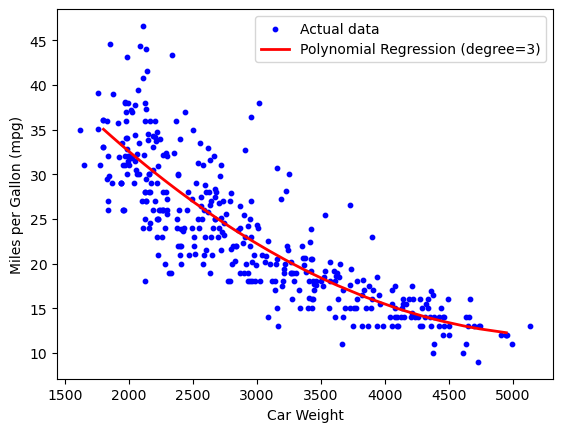

In [1]:
# on dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd


df = sns.load_dataset("mpg").dropna()  # Drop any rows with missing values

# Choose a feature and target variable
# Using 'weight' to predict 'mpg' (miles per gallon)
X = df[['weight']]
y = df['mpg']


degree = 3  # Set polynomial degree (try 2, 3, or more for different fits)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the results
# Sort X_test and y_pred for a smooth curve in the plot
X_test_original = X_test[:, 1]  # Extract original 'weight' feature from X_test
X_test_sorted, y_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test_original, y_test, y_pred)))

plt.scatter(X['weight'], y, color="blue", label="Actual data", s=10)
plt.plot(X_test_sorted, y_pred_sorted, color="red", linewidth=2, label=f"Polynomial Regression (degree={degree})")
plt.xlabel("Car Weight")
plt.ylabel("Miles per Gallon (mpg)")
plt.legend()
plt.show()

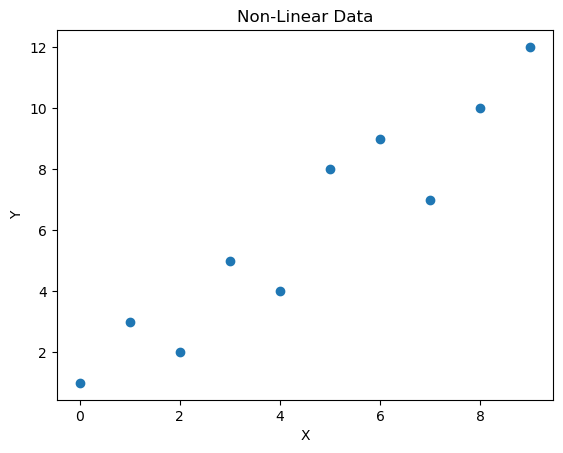

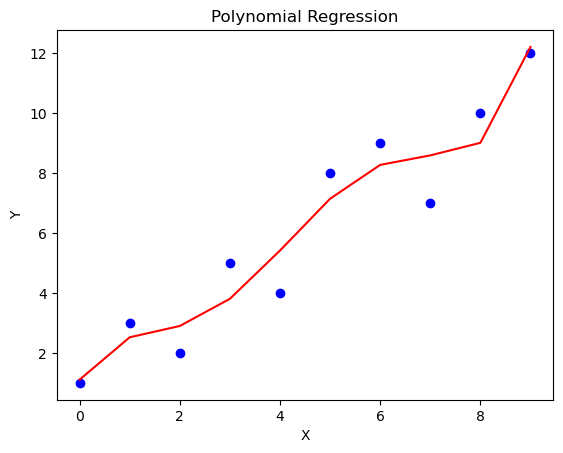

In [3]:
#on array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some sample data with a non-linear relationship
x = np.arange(10).reshape(-1, 1)
y = np.array([1, 3, 2, 5, 4, 8, 9, 7, 10, 12])

# Visualize the data
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Data')
plt.show()

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=5)  # Adjust the degree as needed
x_poly = polynomial_features.fit_transform(x)

# Create a linear regression model
model = LinearRegression()
model.fit(x_poly, y)

# Make predictions
y_pred = model.predict(x_poly)

# Visualize the model's predictions
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.show()